# Introducción al NLP

## Expresiones Regulares
Para motivar el estudio de expresiones regulares veamos la siguiente conversación realizada en 1966 por un chatbot llamado ELIZA y un ser humano:

*Usuario: Me siento triste.*

*ELIZA: ¿Cree que venir acá puede ayudarle a no sentirse triste?*

*Usuario: Necesito ayuda, de eso estoy seguro.*

*ELIZA: ¿Qué significa para usted obtener ayudar?*

*Usuario: A lo mejor podría aprender a llevárme mejor con mi madre.*

*ELIZA: Cuénteme más sobre su madre.*
 
*Usuario: Mi madre cuida de mí.*

*ELIZA: ¿Quién más en su familia cuida de usted?*

*Usuario: Mi padre.*

*ELIZA: ¿Su padre?*

*Usuario: De alguna manera usted se parece a mi padre.*

El fragmento anterio fue extraido de Weizenbaum (1966) y muestra como ELIZA, uno de los primeros sistemas de procesamiento del lenguaje natural, imita respuestas de un psicoterapeuta. Es más, este sistema fue programado para para imitar las respuestas de un [psicoterapeuta Rogersiano](https://es.wikipedia.org/wiki/Psicoterapia_centrada_en_el_cliente). 

Este programa ELIZA es muy simple y exitoso a la vez. Simple porque está entrenado para identificar frases del estilo *"Necesito X"* y responder frases del estilo *"¿Qué significa para usted obtener X?"*. El éxito, por otro lado, consiste en que este no tiene que tener conocimientos previos sobre el significado de las palabras. Este tipo de diálogos permiten que quien hace de terapeuta (ELIZA en este caso) no tenga que saber nada sobre el mundo. 

De hecho, Weizenbaum (1966) reporta que muchas de las personas que interactuaron con este bot creyeron que ELIZA en verdad los estaba entendiendo, inclusive, luego de que se les explicara a los participantes cómo funcionaba ELIZA, muchos seguían pensando que este robot era útil para ayudarlos a lidiar con sus problemas.

Hoy en día, los algoritmos de Procesamiento de Lenguaje Natural son mucho más complejos que ELIZA, sin embargo, la detección de patrones en el texto sigue siendo una base fundamental de este tipo de aplicaciones. En lo que resta del *cuaderno* exploraremos los conceptos básicos de cómo procesar lenguaje natural escrito, texto, para que sea interpretable por el computador, nos permita  extraer información relevante y hacer pre procesamiento necesario para que pueda ser el insumo de sistemas de recomendación.

## Patrones básicos y Expresiones Regulares

El punto de partida del manejo de texto es la detección de patrones en el mismo, esto se hace a través del uso de *expresiones regulares*. Estas que también son conocidas como *regex* o *regexp* son secuencias de caracteres que conforman patrones de búsqueda y tienen la ventaja de ser transversales a los distintos lenguajes de programación.

Para illustrar a qué nos referimos, comencemos con un ejemplo sencillo. El patrón más sencillo que se puede utilizar con expresiones regulares es utilizar secuencia de caracteres que uno quiere encontrar en el texto. Por ejemplo, si quisiéramos buscar la palabra *tienda* en un texto, simplemente podríamos usar como patrón `tienda`. Los patrones de búsqueda pueden estar conformados por un solo caracter como `!` para buscar signos de exclamación o también una secuencia de letras:

<div> <center> 

| **RE** |      **Ejemplo del patrón capturado**     |
|:------:|:-----------------------------------------:|
| tienda | El que tenga <u>tienda</u> que la atienda |
|    a   |    El que m<u>a</u>druga Dios le ayuda    |
|    !   |            ¡Ojo con eso<u>!</u>           |

</center> </div>   

Este tipo de búsquedas es sensible al uso de mayúsculas, por ejemplo, buscar la palabra `tienda` arroja un resultado diferente al de buscar `Tienda`. Del mismo modo, también es sensible al uso de caracteres especiales como tildes, apostrofes, etc. En la práctica se suelen eliminar estos caracteres especiales para simplificar el texto analizado. Por ejemplo, transformar un texto como:

**<center> A palabras necias oídos sordos </center>**

por 

**<center> a palabras necias oidos sordos </center>** 

hará más sencillo su tratamiento. No obstante, las expresiones regulares son una herramienta superpoderosa y nos permiten usar funciones que simplifican la tarea. Por ejemplo, podemos usar los corchetes (`[]`) para expresar disyunción lógica (`o`). Por ejemplo, la búsqueda `[Tt]ienda` sirve para encontrar la palabra `tienda` **o** la palabra `Tienda`. Los corchetes indican que se busca una palabra que contenga la cadena `ienda` precedida por una letra `t` en minúscula **o** mayúscula. Por ejemplo:

<div> <center> 

|    **RE**    |**Patrón capturado**|          **Ejemplo del patrón capturado**            |
|:------------:|:----------------:|:------------------------------------------------------:|
|   [Tt]ienda  |  Tienda o tienda |        El que tiene <u>tienda</u> que la atienda       |
|     [abc]    |   a, b **o** c   | No me <u>a</u>bra los ojos que no le voy a echar gotas |
| [1234567890] | Cualquier dígito |            Eramos entre <u>5</u> y 8 personas   |

</div> </center> 

Notemos en la última linea que la expresión regular `[1234567890]` nos permite capturar cualquier dígito, no obstante, escribir bloques de dígitos o letras puede ser inconveniente. Es decir, para capturar cualquier letra no es práctico escribir todo el abecedario: `[abcdefghijklmnopqrstuvwxyz]`. En estos casos uno puede completar la búsqueda dentro de corchetes con un guión (`-`) que especifica rangos. Por ejemplo `[0-9]` nos permite capturar cualquier número entre 0 y 9, `[b-g]` nos permite capturar cualquier letra de la `b` a la `g` o sea *b, c, d, e, f **o** g*.

<div> <center>

| **RE** |     **Patrón capturado**     |            **Ejemplo del patrón capturado**            |
|:------:|:----------------------------:|:------------------------------------------------------:|
|  [A-Z] | Cualquier letra en mayúscula |        <u>E</u>l que tiene tienda que la atienda       |
|  [a-z] | Cualquier letra en minúscula | N<u>o</u> me abra los ojos que no le voy a echar gotas |
|  [0-9] |       Cualquier dígito       |       Eramos entre <u>5</u> y 8 personas       |

</div> </center>

Podemos también indicar que caracteres no deben ser capturados, para ello utilizamos un caret (`^`) al inicio del corchete `[^]`. Sólo si el caret (`^`) es el primer símbolo dentro del corchete, el patrón subsiguiente es negado. Por ejemplo, `[^a]` significa que se va a capturar cualquier caracter, incluyendo los especiales, excepto la letra *a*. 

<div> <center>

| **RE** |               **Patrón capturado**              |            **Ejemplo del patrón capturado**            |
|:------:|:-----------------------------------------------:|:------------------------------------------------------:|
| [^A-Z] | Cualquier caracter menos una letra en mayúscula |       E<u>l</u> que tiene tienda que la atienda       |
|  [^Ss] |     Cualquier caracter excepto una "s" o "S"    | <u>N</u>o me abra los ojos que no le voy a echar gotas |
|  [^.]  |        Cualquier caracter menos un punto        |       <u>E</u>ramos al rededor de 5 a 8 personas       |
|  [e^]  |             Captura una "e" o un "^"            |                       <u>e</u>^x                       |
|  [a^b] |                   Captura a^b                   |                 La expresión <u>a^b</u>                |

</div> </center>

Note sin embargo, que si se usa el caret (`^`) en cualquier otro lugar de la expresión regular, este no va a significar una negación, sino un caret.

Del mismo modo, a menudo buscamos capturar patrones opcionales. Por ejemplo, para capturar una palabra en plural o en singular en donde el último caracter es una *s*. Para esto utilizamos el símbolo de pregunta (`?`) después del caracter opcional. El signo de pregunta (`?`) en el contexto de expresiones regulares significa el caracter anterior o ninguno.


<div> <center>

|  **RE**  | **Patrón capturado** |            **Ejemplo del patrón capturado**           |
|:--------:|:--------------------:|:-----------------------------------------------------:|
| tiendas? | "tienda" o "tiendas" |       El que tenga <u>tienda</u> que la atienda       |
|  colou?r |  "color" o "colour"  | Discover the newest hand-picked <u>color</u> palettes |

</div> </center>

Pero también existen casos donde un caracter se puede repetir más de una vez. Por ejemplo, en un libro se podría encontrar la onomatopeya del mujido de una vaca de diversas formas:

**<center> Muu! </center>**

**<center> Muuu! </center>** 

**<center> Muuuu! </center>** 

**<center> Muuuuu! </center>** 

A grandes rasgos, podemos describir esta onomatopeya como una palabra que comienza con una *M* seguida con por lo menos dos *u* y finaliza con el signo de exclamación *!*. La expresión regular que nos permite capturar cero o más ocurrencias de un caracter es el asterisco (`*`) también conocido como *cleany star* o *Kleene* . Por ende, la expresión regular `u*` va a capturar tanto `u` como `uuuuuu`, pero a su vez también podría capturar `vaca` pues esta palabra tiene cero letras u. 

Para corregir esto, podríamos usar la expresión regular `uu*` la cual significa una o más letras u. Algunos patrones más complejos también se pueden utilizar haciendo uso de los corchetes; por ejemplo `[ab]\*` sirve para capturar cero o más *a*s o *b*s. Por ende, se capturarían textos como *aaaaa*, *bbb* o *ababababab*.

Asimismo, para especificar múltiples dígitos podemos usar `[0-9][0-9]*` para capturar cualquier entero. 

Sin embargo, aún podemos utilizar el signo de suma (`+`), también llamado *Kleene +*, para simplificar las expresiones regulares. El *Kleene +*, nos permite denotar que el caracter a capturar se repite una o más veces. Por ende, la expresión `[0-9]+` es la forma más común de expresar una secuencia de dígitos. Por ejemplo:

<div> <center>

|  **RE**  | **Patrón capturado** |            **Ejemplo del patrón capturado**           |
|:--------:|:--------------------:|:-----------------------------------------------------:|
|   baa*   |  ba con una o más as |               La cabra hace <u>baaa</u>!              |
|   mu+!   | mu! con una o más us |              La vaca hizo <u>muuuuu!</u>              |
|  [0-9]+  |   Cualquier entero   |              Ese camisa cuesta $<u>25</u>             |

</div> </center>

Otra función importante esta dada por el punto (`.`). Este funciona como comodín o *wildcard*. Esta expresión regular sirve para capturar cualquier caracter excepto los saltos de línea. 

<div> <center>

|  **RE**  | **Patrón capturado** |            **Ejemplo del patrón capturado**           |
|:--------:|:--------------------:|:-----------------------------------------------------:|
   |
|   1. | 10 y 1A             | Ganaron el partido <u>18</u> a 2             |
|  1.4 | 114 y 1B4            | Vive en el apartamento <u>1B4<u> |

</div> </center>

También existen los denominado anclas o *anchors* que sirven para capturar elementos en posiciones particulares del texto. Los más comunes son el caret (`^`) y el símbolo de dolar (`$`) los cuales hacen alusión al inicio y final de un texto respectivamente. Por ejemplo, la expresión `^El` solo captura la palabra *El* sólo si está al inicio del corpus de texto. Otras anclas comunes son (`\b`) y (`\B`) que denotan los *boundaries* o límites de una palabra o dentro de una palabra respectivamente. Por ejemplo, `\bel\b` va a capturar la palabra *el* pero no *elefante*.

### Disyunción, agrupación y precedencia

A menudo estaremos interesados en buscar más de una palabra a la vez. Por ejemplo, si en nuestro texto quisiéramos buscar países de Latinoamérica,  escribir `[ColombiaPerúChileMéxico...]` sólo nos devolvería alguna de las letras presentes en los corchetes. El operador de disyunción (`|`) sirve para este tipo de casos donde estamos interesados en una u otra palabra, por eso, el patrón `Colombia|Perú|Chile` devuelve Colombia, Perú o Chile. 

A su vez, puede que nos interesemos no sólo en los países como tal, sino también los gentilicios. Por ejemplo, si queremos extraer Chile o Chilenos necesitamos sofisticar nuestro operador de disyunción para evitar escribir la expresión `Chile|Chilenos`. En este caso podemos utilizar  paréntesis para inidcar que la disyunción sólo aplica para una parte del texto: `Chil(e|enos)`. Note que si omitiéramos los paréntesis `Chile|enos` solo se capturaría *Chile* o *enos* y dado que *Chile* tiene precedencia sobre *enos* en caso de encontrar la palabra *Chilenos* sólo se extraería la primer parte: *Chile* sin el *nos*.

Los paréntesis también son un gran complemento para los asteriscos (`*`). Supongamos poseemos el índice de un libro que tiene el siguiente texto: Capítulo 1, Capítulo 2, Capítulo 3, etc. Para capturar todos los capítulos necesitamos crear un patrón que capture repetidamente la palabra *Capítulo* seguida de algún entero. La expresión regular `Capítulo [0-9]+ *` sólo captura *Capítulo* seguida de un entero y 0 más espacios, en este caso necesitamos utilizar los paréntesis: `(Capítulo [0-9]+ *)*`.

### Algunos operadores adicionales

<div> <center>

| **RE** | **Expansión** |                          **Patrón capturado**                         |
|:------:|:-------------:|:---------------------------------------------------------------------:|
|   \d   |     [0-9]     |                            Cualquier dígito                           |
|   \D   |     [^0-9]    |                          Cualquier no dígito                          |
|   \w   |  [a-zA-Z0-9_] |                  Cualquier alfanumérico o guion bajo                  |
|   \W   |     [ˆ\w]     |                 Cualquier no alfanumérico o guion bajo                |
|   \s   |  [ \r\t\n\f]  |                           Espacio en blanco                           |
|   \S   |     [ˆ\s]     |                        No un espacio en blanco                        |
|    *   |               |         Cero o más ocurrencias del caracter o expresión pasada        |
|    +   |               |         Una o más ocurrencias del caracter o expresión pasada         |
|    ?   |               | Exactamente cero o una ocurrencia del del caracter o expresión pasada |
|   {n}  |               |            *n* ocurrencias del caracter o expresión pasada            |
|  {n,m} |               |        De *n* a *m* ocurrencias del caracter o expresión pasada       |
|  {n,}  |               |      Por lo menos *n* ocurrencias del caracter o expresión pasada     |
|  {,m}  |               |         Hasta *m* ocurrencias del caracter o expresión pasada         |

</div> </center>

Estos son algunos de los patrones y operadores básicos que vamos a necesitar y utilizar en este curso; sin embargo hay mucho más y los invito a explorarlos por su cuenta. Antes de ilustrar el uso en `Python` es importante recomendar la página https://regexr.com  que permite probar el correcto funcionamiento de las expresiones regulares creadas antes de utilizarlas en el código.

Para trabajar con expresiones regulares vamos a utilizar la librería  `re` que cuenta entre sus principales funciones a:

* `re.findall()`: retorna una lista con todos los matchs dentro del texto.
* `re.search()`: retorna un objeto de tipo *match* si existe algún match en el texto.
* `re.split()`: devuelve una lista donde la cadena se ha dividido en cada match.
* `re.sub()`: reemplaza una o más coincidencias con el texto deseado.

A su vez, otros paquetes como `Pandas` tienen métodos que permiten hacer uso de expresiones regulares para modificar el objeto. 

In [1]:
import re

mi_cadena = "¡Escribamos RegEx! ¿No sería divertido? Yo creo que sí. ¿Puedes encontrar 4 frases? ¿O quizás, todas las 19 palabras?"

El regex `r"[.?!]"` se usa para coincidir con cualquiera de los caracteres que están dentro de los corchetes `[ ]`. En este caso, los caracteres son los signos de puntuación punto (`.`), signo de interrogación (`?`) y signo de exclamación (`!`). 

Estos caracteres son comúnmente usados para indicar el final de una oración en muchos idiomas, incluyendo el inglés y el español. Al utilizar este patrón en funciones como `re.split()`, se puede dividir un texto en oraciones basándose en estos delimitadores. Por ejemplo, al aplicar este patrón a un texto, se segmentará el texto cada vez que encuentre uno de estos símbolos, efectivamente separando las oraciones completas unas de otras. 

Aquí algunos detalles técnicos de cómo funciona el regex `r"[.?!]"`:

- **Corchetes `[ ]`**: Indican un conjunto de caracteres. El patrón coincidirá con cualquier carácter individual que se encuentre dentro de los corchetes.
- **Caracteres dentro de los corchetes**:
  - **`.`**: Representa el punto. En otros contextos de regex, el punto puede significar "cualquier carácter", pero dentro de los corchetes pierde ese significado especial y se trata como un punto literal.
  - **`?`**: Representa el signo de interrogación. Al igual que el punto, dentro de los corchetes se toma literalmente y no como un operador especial de regex.
  - **`!`**: Representa el signo de exclamación, también tomado literalmente dentro de los corchetes.

In [2]:
# Escribe un patrón para coincidir con los finales de las frases: finales_de_frase
finales_de_frase = r"[.?!]"

# Divide mi_cadena en los finales de las frases e imprime el resultado
lista_frases = re.split(finales_de_frase, mi_cadena)
lista_frases

['¡Escribamos RegEx',
 ' ¿No sería divertido',
 ' Yo creo que sí',
 ' ¿Puedes encontrar 4 frases',
 ' ¿O quizás, todas las 19 palabras',
 '']

`\w = [a-zA-Z]`

In [3]:
# Encuentra todas las palabras con mayúsculas en mi_cadena e imprime el resultado
palabras_mayusculas = r"[A-Z]\w+" # "[A-Z]\w*"
palabras_mayusculas_lista = re.findall(palabras_mayusculas, mi_cadena)
palabras_mayusculas_lista

['Escribamos', 'RegEx', 'No', 'Yo', 'Puedes']

`" " = \s`

In [4]:
# Divide mi_cadena en espacios e imprime el resultado
espacios = r"\s+"
lista_espacios = re.split(espacios, mi_cadena)
lista_espacios

['¡Escribamos',
 'RegEx!',
 '¿No',
 'sería',
 'divertido?',
 'Yo',
 'creo',
 'que',
 'sí.',
 '¿Puedes',
 'encontrar',
 '4',
 'frases?',
 '¿O',
 'quizás,',
 'todas',
 'las',
 '19',
 'palabras?']

`[0-9] = \d`

In [5]:
# Encuentra todos los dígitos en mi_cadena e imprime el resultado
digitos = r"\d+"
lista_digitos = re.findall(digitos, mi_cadena)
lista_digitos

['4', '19']

In [ ]:
ejercicio1 = "Compré 4 manzanas y 3 peras por $15,000 pesos"

# Hagan un RegEx para saber cuántas frutas compró
# Hagan otro RegEx para saber cuánto valió la compra total

In [ ]:
ejercicio2 = "Mi cumpleaños es el 18/07/1998 ¿Cuándo es el tuyo?"

# Extraiga la fecha de cumpleaños

### Tokenización
La tokenización es un proceso fundamental en el campo del procesamiento del lenguaje natural (NLP). Se refiere al proceso de dividir un texto en partes más pequeñas, llamadas tokens. Estos tokens pueden ser palabras, frases, símbolos o cualquier otro elemento que tenga sentido en el contexto del texto que se está analizando.

La librería `nltk` suele ser la librería más utilizada para realizar procesamiento del lenguaje natural en `Python`. Para entender mejor este concepto le recomendamos revisar el siguiente [enlace](https://platform.openai.com/tokenizer)

In [6]:
escena_uno = """
ESCENA 1: [viento] [clop clop clop]\n
REY ARTURO: ¡Alto ahí! [clop clop clop]\n
SOLDADO #1: ¡Alto! ¿Quién va?\n
ARTURO: Soy yo, Arturo, hijo de Uther Pendragon, del castillo de Camelot. ¡Rey de los Britones, vencedor de los sajones, soberano de toda Inglaterra\n
SOLDADO #1: ¡Dí otra!\n
ARTURO: Soy, ... y este es mi fiel sirviente Patsy. Hemos cabalgado por la longitud y la anchura de la tierra en busca de caballeros que se unan a mi corte en Camelot. Debo hablar con tu señor y maestro.\n
SOLDADO #1: ¿Qué? ¿Cabalgado en un caballo?\n
ARTURO: ¡Sí!\n
SOLDADO #1: ¡Estás usando cocos!\n
ARTURO: ¿Qué?\n
SOLDADO #1: Tienes dos mitades vacías de coco y las estás golpeando juntas.\n
ARTURO: ¿Y qué? Hemos cabalgado desde que las nieves de invierno cubrieron esta tierra, a través del reino de Mercea, a través de--\n
SOLDADO #1: ¿De dónde sacaste los cocos?\n
ARTURO: Los encontramos.\n
SOLDADO #1: ¿Los encontraron? ¿En Mercea? ¡El coco es tropical!\n
ARTURO: ¿Qué quieres decir?\n
SOLDADO #1: Bueno, esta es una zona templada.\n
ARTURO: La golondrina puede volar al sur con el sol o la golondrina común o el chorlito pueden buscar climas más cálidos en invierno, ¿y aún así no son extraños en nuestra tierra?\n
SOLDADO #1: ¿Estás sugiriendo que los cocos migran?\n
ARTURO: En absoluto. Podrían ser transportados.\n
SOLDADO #1: ¿Qué? ¿Una golondrina llevando un coco?\n
ARTURO: ¡Podría agarrarlo por la cáscara!\n
SOLDADO #1: ¡No es cuestión de dónde lo agarra! ¡Es una simple cuestión de proporciones de peso! Un pájaro de cinco onzas no podría llevar un coco de una libra.\n
ARTURO: Bueno, no importa. ¿Irás a decirle a tu maestro que Arturo de la Corte de Camelot está aquí?\n
SOLDADO #1: Escucha. Para mantener la velocidad de vuelo, una golondrina necesita batir sus alas cuarenta y tres veces cada segundo, ¿verdad?\n
ARTURO: ¡Por favor!\n
SOLDADO #1: ¿Tengo razón?\n
ARTURO: ¡No me interesa!\n
SOLDADO #2: ¡Podría ser llevado por una golondrina africana!\n
SOLDADO #1: Oh, sí, una golondrina africana tal vez, pero no una europea. Ese es mi punto.\n
SOLDADO #2: Oh, sí, estoy de acuerdo con eso.\n
ARTURO: ¿Preguntarás a tu maestro si quiere unirse a mi corte en Camelot?\n
SOLDADO #1: Pero entonces, claro, las golondrinas africanas no migran.\n
SOLDADO #2: Oh, sí...\n
SOLDADO #1: Así que no podrían traer un coco de todos modos... [clop clop clop]\n
SOLDADO #2: ¡Espera un minuto! ¿Y si dos golondrinas lo llevaran juntas?\n
SOLDADO #1: No, tendrían que tenerlo en una línea.\n
SOLDADO #2: ¡Pues fácil! ¡Solo usarían un pedazo de enredadera!\n
SOLDADO #1: ¿Qué, sujetado bajo las plumas guía dorsales?\n
SOLDADO #2: Pues, ¿por qué no?\n
"""

In [7]:
# Importar los módulos necesarios
from nltk.tokenize import sent_tokenize
from nltk.tokenize import word_tokenize

# Dividir scene_one en oraciones: sentences
sentences = sent_tokenize(escena_uno, language = "spanish")

In [8]:
?sent_tokenize

Signature: sent_tokenize(text, language='english')
Docstring:
Return a sentence-tokenized copy of *text*,
using NLTK's recommended sentence tokenizer
(currently :class:`.PunktSentenceTokenizer`
for the specified language).

:param text: text to split into sentences
:param language: the model name in the Punkt corpus
File:      c:\users\lucas\anaconda3\envs\bx\lib\site-packages\nltk\tokenize\__init__.py
Type:      function

In [9]:
sentences[3]

'ARTURO: Soy yo, Arturo, hijo de Uther Pendragon, del castillo de Camelot.'

In [10]:
# Usar word_tokenize para tokenizar la cuarta oración: tokenized_sent
tokenized_sent = word_tokenize(sentences[3])
tokenized_sent

['ARTURO',
 ':',
 'Soy',
 'yo',
 ',',
 'Arturo',
 ',',
 'hijo',
 'de',
 'Uther',
 'Pendragon',
 ',',
 'del',
 'castillo',
 'de',
 'Camelot',
 '.']

In [11]:
# Crear un conjunto de tokens únicos en toda la escena: unique_tokens
unique_tokens = set(word_tokenize(escena_uno))

# Imprimir el resultado de los tokens únicos
print(unique_tokens)

{'y', ':', '¡Podría', 'quiere', 'usarían', 'golondrinas', 'Uther', '¡Espera', '¡Alto', '¿De', 'peso', 'dorsales', 'agarra', 'veces', 'absoluto', 'fácil', 'golondrina', '¡Estás', 'vencedor', '[', 'razón', 'busca', 'todos', 'extraños', 'tal', 'Pendragon', 'africanas', '¿Estás', 'Un', 'cuestión', 'transportados', 'está', 'Escucha', 'ESCENA', 'Patsy', '¡El', '¿Qué', '¡Es', 'Los', 'tropical', 'ARTURO', 'claro', '¿verdad', 'llevaran', 'longitud', '¿por', 'velocidad', '¡Dí', 'fiel', 'esta', 'clop', 'Para', 'acuerdo', 'sus', 'o', 'agarrarlo', 'REY', 'vacías', 'corte', '!', 'usando', 'unan', 'sirviente', '#', 'Así', 'En', 'línea', '¡Solo', 'caballo', 'sajones', 'Ese', 'toda', 'este', 'cabalgado', 'nuestra', 'alas', 'por', 'climas', 'podrían', 'pájaro', 'zona', 'guía', 'invierno', 'tenerlo', '¿Quién', 'sacaste', 'sol', 'necesita', 'hijo', 'proporciones', 'estoy', 'chorlito', 'llevar', 'decir', 'en', '¿Cabalgado', 'Camelot', 'tu', 'encontraron', ',', 'maestro', '.', 'la', 'cáscara', 'estás', 'pod

In [12]:
# Buscar la primera ocurrencia de "coconuts" en scene_one: match
match = re.search("cocos", escena_uno)

# Imprimir los índices de inicio y fin de match
print(match.start(), match.end())

match.group(0)

573 578


'cocos'

In [13]:
tweets = ['¡Este es el mejor ejercicio de #nlp que he encontrado en línea! #python',
'#NLP es súper divertido! <3 #aprendizaje',
'Gracias @LucasAntonioII :) #nlp #python']

# Definir un patrón regex para encontrar hashtags: pattern1
pattern1 = r"(#\w+)"
# Usar el patrón en el primer tweet de la lista de tweets
hashtags = re.findall(pattern1, tweets[0])
print(hashtags)

['#nlp', '#python']


In [14]:
# Divida el texto en líneas
lines = re.split('\n', escena_uno)
lines = [i for i in lines if "" != i]
lines

['ESCENA 1: [viento] [clop clop clop]',
 'REY ARTURO: ¡Alto ahí! [clop clop clop]',
 'SOLDADO #1: ¡Alto! ¿Quién va?',
 'ARTURO: Soy yo, Arturo, hijo de Uther Pendragon, del castillo de Camelot. ¡Rey de los Britones, vencedor de los sajones, soberano de toda Inglaterra',
 'SOLDADO #1: ¡Dí otra!',
 'ARTURO: Soy, ... y este es mi fiel sirviente Patsy. Hemos cabalgado por la longitud y la anchura de la tierra en busca de caballeros que se unan a mi corte en Camelot. Debo hablar con tu señor y maestro.',
 'SOLDADO #1: ¿Qué? ¿Cabalgado en un caballo?',
 'ARTURO: ¡Sí!',
 'SOLDADO #1: ¡Estás usando cocos!',
 'ARTURO: ¿Qué?',
 'SOLDADO #1: Tienes dos mitades vacías de coco y las estás golpeando juntas.',
 'ARTURO: ¿Y qué? Hemos cabalgado desde que las nieves de invierno cubrieron esta tierra, a través del reino de Mercea, a través de--',
 'SOLDADO #1: ¿De dónde sacaste los cocos?',
 'ARTURO: Los encontramos.',
 'SOLDADO #1: ¿Los encontraron? ¿En Mercea? ¡El coco es tropical!',
 'ARTURO: ¿Qué qu

In [15]:
# Quite el nombre del hablante
lines = [re.findall(".: (.*)", line)[0] for line in lines]
lines

['[viento] [clop clop clop]',
 '¡Alto ahí! [clop clop clop]',
 '¡Alto! ¿Quién va?',
 'Soy yo, Arturo, hijo de Uther Pendragon, del castillo de Camelot. ¡Rey de los Britones, vencedor de los sajones, soberano de toda Inglaterra',
 '¡Dí otra!',
 'Soy, ... y este es mi fiel sirviente Patsy. Hemos cabalgado por la longitud y la anchura de la tierra en busca de caballeros que se unan a mi corte en Camelot. Debo hablar con tu señor y maestro.',
 '¿Qué? ¿Cabalgado en un caballo?',
 '¡Sí!',
 '¡Estás usando cocos!',
 '¿Qué?',
 'Tienes dos mitades vacías de coco y las estás golpeando juntas.',
 '¿Y qué? Hemos cabalgado desde que las nieves de invierno cubrieron esta tierra, a través del reino de Mercea, a través de--',
 '¿De dónde sacaste los cocos?',
 'Los encontramos.',
 '¿Los encontraron? ¿En Mercea? ¡El coco es tropical!',
 '¿Qué quieres decir?',
 'Bueno, esta es una zona templada.',
 'La golondrina puede volar al sur con el sol o la golondrina común o el chorlito pueden buscar climas más cá

### Preprocesamiento de texto: Acuerdo de Paz y tidyX

In [18]:
# Cargamos pdfplumber
import pdfplumber

# Procedemos a extraer todo el texto del documento
with pdfplumber.open('Acuerdo de paz.pdf') as pdf:
    paginas = pdf.pages
    documento = ""
    for pag in paginas:
        text = pag.extract_text()
        documento = documento + " " + text
        
# Visualizamos 500 caracteres del texto
print(documento[0:500])        

 Acuerdo Final
12.11.2016
ACUERDO FINAL PARA LA TERMINACIÓN DEL CONFLICTO Y LA CONSTRUCCIÓN DE UNA PAZ
ESTABLE Y DURADERA
PREÁMBULO
Recordando que los diálogos de La Habana entre delegados y delegadas del Gobierno Nacional,
presidido por el Presidente Juan Manuel Santos y delegados y delegadas de las Fuerzas Armadas
Revolucionarias de Colombia-Ejército del Pueblo, con la decisión mutua de poner fin al conflicto
armado nacional, tuvieron origen como resultado del Encuentro Exploratorio sucedido e


In [19]:
import unidecode

# creamos copia de seguridad
documento_original = documento 

# Quitamos tildes
documento = unidecode.unidecode(documento)
print(documento[0:500]) 

 Acuerdo Final
12.11.2016
ACUERDO FINAL PARA LA TERMINACION DEL CONFLICTO Y LA CONSTRUCCION DE UNA PAZ
ESTABLE Y DURADERA
PREAMBULO
Recordando que los dialogos de La Habana entre delegados y delegadas del Gobierno Nacional,
presidido por el Presidente Juan Manuel Santos y delegados y delegadas de las Fuerzas Armadas
Revolucionarias de Colombia-Ejercito del Pueblo, con la decision mutua de poner fin al conflicto
armado nacional, tuvieron origen como resultado del Encuentro Exploratorio sucedido e


Podemos ver que *Ejército* aparecía con tilde ya no la tiene. 

A continuación usaremos la expresión regular `[^A-Za-z0-9 ]+` para matchear todo lo que no sea un caracter alfanumérico o un espacio y lo reemplazamos con un espacio. Esto quitará comas, guiones y otros caracteres especiales o signos de puntuación. Note la presencia del caret `^` al inicio de los corchetes cuadrados.

In [20]:
documento = re.sub('[^A-Za-z0-9 ]+', ' ', documento)
print(documento[0:500])

 Acuerdo Final 12 11 2016 ACUERDO FINAL PARA LA TERMINACION DEL CONFLICTO Y LA CONSTRUCCION DE UNA PAZ ESTABLE Y DURADERA PREAMBULO Recordando que los dialogos de La Habana entre delegados y delegadas del Gobierno Nacional presidido por el Presidente Juan Manuel Santos y delegados y delegadas de las Fuerzas Armadas Revolucionarias de Colombia Ejercito del Pueblo  con la decision mutua de poner fin al conflicto armado nacional  tuvieron origen como resultado del Encuentro Exploratorio sucedido en


A continuación ponemos todo en minúscula y con un sólo espacio

In [21]:
# Minúsculas
documento = documento.lower()
# Espacios
documento = re.sub('\s+', ' ', documento)
print(documento[0:500])

 acuerdo final 12 11 2016 acuerdo final para la terminacion del conflicto y la construccion de una paz estable y duradera preambulo recordando que los dialogos de la habana entre delegados y delegadas del gobierno nacional presidido por el presidente juan manuel santos y delegados y delegadas de las fuerzas armadas revolucionarias de colombia ejercito del pueblo con la decision mutua de poner fin al conflicto armado nacional tuvieron origen como resultado del encuentro exploratorio sucedido en l


Puesto que nos interesa ver la frecuencia de palabras, eliminaremos todos los números y espacios no simples que se hayan generado.

In [22]:
documento = re.sub("\d+", "", documento)
documento = re.sub('\s+', ' ', documento)
documento = documento.strip()
print(documento[0:500])

acuerdo final acuerdo final para la terminacion del conflicto y la construccion de una paz estable y duradera preambulo recordando que los dialogos de la habana entre delegados y delegadas del gobierno nacional presidido por el presidente juan manuel santos y delegados y delegadas de las fuerzas armadas revolucionarias de colombia ejercito del pueblo con la decision mutua de poner fin al conflicto armado nacional tuvieron origen como resultado del encuentro exploratorio sucedido en la capital de


Note que la expresión regular `'\s+'` hace alusión a que se matcheen todo tipo de espacios en blanco 1 o más veces. Estos incluyen tabs, saltos a nuevas líneas, entre otros. Esta expresión regular es mucho más completa que `' +'`, que sólo identifica los espacios en blanco que separan palabras dentro de una misma línea.

El próximo paso es eliminar lo que se conoce como las *stopwords*, que son aquellas palabras que no le añaden ningún significado al texto, por ejemplo: el, la, y, o, del, con, a, etc. Para ello, ahora sí, utilizamemos `nltk` que posee una lista de los stopwords por idioma. 

Vamos a descargar las del idioma español y a ponerlas en el formato acorde a nuestro documento. (Si este camino arroja error, podés importar *nltk* (`import nltk`) y ejecutar (`nltk.download()`) se abrirá un menú donde podés instalar el corpus de *stopwords*)

In [23]:
doc = word_tokenize(documento)

print(doc[0:500])

['acuerdo', 'final', 'acuerdo', 'final', 'para', 'la', 'terminacion', 'del', 'conflicto', 'y', 'la', 'construccion', 'de', 'una', 'paz', 'estable', 'y', 'duradera', 'preambulo', 'recordando', 'que', 'los', 'dialogos', 'de', 'la', 'habana', 'entre', 'delegados', 'y', 'delegadas', 'del', 'gobierno', 'nacional', 'presidido', 'por', 'el', 'presidente', 'juan', 'manuel', 'santos', 'y', 'delegados', 'y', 'delegadas', 'de', 'las', 'fuerzas', 'armadas', 'revolucionarias', 'de', 'colombia', 'ejercito', 'del', 'pueblo', 'con', 'la', 'decision', 'mutua', 'de', 'poner', 'fin', 'al', 'conflicto', 'armado', 'nacional', 'tuvieron', 'origen', 'como', 'resultado', 'del', 'encuentro', 'exploratorio', 'sucedido', 'en', 'la', 'capital', 'de', 'la', 'republica', 'de', 'cuba', 'entre', 'el', 'dia', 'de', 'febrero', 'y', 'el', 'dia', 'de', 'agosto', 'de', 'estimando', 'que', 'como', 'resultado', 'de', 'los', 'dialogos', 'exploratorios', 'referidos', 'se', 'produjo', 'un', 'acuerdo', 'general', 'para', 'la', 

In [24]:
# Eliminamos stopwords
from nltk.corpus import stopwords

stopwords = set(stopwords.words("spanish"))

# Creamos un diccionario de stopwords en español
stopwords = [unidecode.unidecode(i) for i in stopwords]
stopwords = set(stopwords)

documento = [tok for tok in doc if str(tok) not in stopwords]
documento

['acuerdo',
 'final',
 'acuerdo',
 'final',
 'terminacion',
 'conflicto',
 'construccion',
 'paz',
 'estable',
 'duradera',
 'preambulo',
 'recordando',
 'dialogos',
 'habana',
 'delegados',
 'delegadas',
 'gobierno',
 'nacional',
 'presidido',
 'presidente',
 'juan',
 'manuel',
 'santos',
 'delegados',
 'delegadas',
 'fuerzas',
 'armadas',
 'revolucionarias',
 'colombia',
 'ejercito',
 'pueblo',
 'decision',
 'mutua',
 'poner',
 'fin',
 'conflicto',
 'armado',
 'nacional',
 'origen',
 'resultado',
 'encuentro',
 'exploratorio',
 'sucedido',
 'capital',
 'republica',
 'cuba',
 'dia',
 'febrero',
 'dia',
 'agosto',
 'estimando',
 'resultado',
 'dialogos',
 'exploratorios',
 'referidos',
 'produjo',
 'acuerdo',
 'general',
 'terminacion',
 'conflicto',
 'construccion',
 'paz',
 'estable',
 'duradera',
 'firmado',
 'fecha',
 'ultima',
 'citada',
 'testigos',
 'nacionales',
 'delegados',
 'republica',
 'cuba',
 'reino',
 'noruega',
 'sirvieron',
 'igualmente',
 'testigos',
 'entonces',
 'a

[tidyX](https://tidyx.readthedocs.io/en/latest/) nos va a hacer la vida más sencilla. Podemos hacer todo eso en una sola línea con [tp.preprocess()](https://tidyx.readthedocs.io/en/latest/user_documentation/TextPreprocessor.html#tidyX.text_preprocessor.TextPreprocessor.preprocess)

In [25]:
from tidyX import TextPreprocessor as tp

documento2 = tp.preprocess(string = documento_original, delete_emojis = True, 
                           allow_numbers = False, remove_stopwords = True, 
                           language_stopwords = 'spanish')
documento2 = word_tokenize(documento2)
documento2

['acuerdo',
 'final',
 'acuerdo',
 'final',
 'terminacion',
 'conflicto',
 'construccion',
 'paz',
 'estable',
 'duradera',
 'preambulo',
 'recordando',
 'dialogos',
 'habana',
 'delegados',
 'delegadas',
 'gobierno',
 'nacional',
 'presidido',
 'presidente',
 'juan',
 'manuel',
 'santos',
 'delegados',
 'delegadas',
 'fuerzas',
 'armadas',
 'revolucionarias',
 'colombia',
 'ejercito',
 'pueblo',
 'decision',
 'mutua',
 'poner',
 'fin',
 'conflicto',
 'armado',
 'nacional',
 'origen',
 'resultado',
 'encuentro',
 'exploratorio',
 'sucedido',
 'capital',
 'republica',
 'cuba',
 'dia',
 'febrero',
 'dia',
 'agosto',
 'estimando',
 'resultado',
 'dialogos',
 'exploratorios',
 'referidos',
 'produjo',
 'acuerdo',
 'general',
 'terminacion',
 'conflicto',
 'construccion',
 'paz',
 'estable',
 'duradera',
 'firmado',
 'fecha',
 'ultima',
 'citada',
 'testigos',
 'nacionales',
 'delegados',
 'republica',
 'cuba',
 'reino',
 'noruega',
 'sirvieron',
 'igualmente',
 'testigos',
 'entonces',
 'a

### Stemming y Lemmatización eficiente

In [26]:
import pandas as pd
df = pd.DataFrame({"Original": documento2})

In [27]:
from tidyX import TextNormalization as tn

dictionary_normalization = tp.unnest_tokens(df = df.copy(), input_column = "Original", id_col = None, unique = True)
dictionary_normalization

,Original,id
0,abajo,"9907, 25713, 25987"
1,abandonadas,"4981, 43256, 43806"
2,abandonar,"24203, 24330, 43551"
3,abandonaron,43655
4,abandono,"700, 2553, 2834, 2909, 3148, 7858, 8005, 11483..."
...,...,...
6990,zonas,"2536, 2786, 3124, 3356, 3686, 4078, 4364, 4515..."
6991,zonificacion,"4554, 4720"
6992,zrc,"2539, 4682, 4761, 4806, 4846, 4853, 4879, 2453..."
6993,zs,"51692, 52325, 59072, 59098, 59180"


In [28]:
# Apply spanish_lemmatizer function to lemmatize the token
dictionary_normalization["stemm"] = dictionary_normalization["Original"].apply(lambda x: tn.stemmer(token = x, language = "spanish"))
dictionary_normalization

,Original,id,stemm
0,abajo,"9907, 25713, 25987",abaj
1,abandonadas,"4981, 43256, 43806",abandon
2,abandonar,"24203, 24330, 43551",abandon
3,abandonaron,43655,abandon
4,abandono,"700, 2553, 2834, 2909, 3148, 7858, 8005, 11483...",abandon
...,...,...,...
6990,zonas,"2536, 2786, 3124, 3356, 3686, 4078, 4364, 4515...",zon
6991,zonificacion,"4554, 4720",zonificacion
6992,zrc,"2539, 4682, 4761, 4806, 4846, 4853, 4879, 2453...",zrc
6993,zs,"51692, 52325, 59072, 59098, 59180",zs


In [29]:
import spacy

# Load model
model_es = spacy.load("es_core_news_sm")

# Apply lemmatizer function to lemmatize the token
dictionary_normalization["lemma"] = dictionary_normalization["Original"].apply(lambda x: tn.lemmatizer(token = x, model = model_es))

# Lemmatizing could produce stopwords, therefore we applied remove_words function
dictionary_normalization["lemma"] = dictionary_normalization["lemma"].apply(lambda x: tp.remove_words(x, remove_stopwords = True, language = "spanish"))

dictionary_normalization

,Original,id,stemm,lemma
0,abajo,"9907, 25713, 25987",abaj,abajo
1,abandonadas,"4981, 43256, 43806",abandon,abandonado
2,abandonar,"24203, 24330, 43551",abandon,abandonar
3,abandonaron,43655,abandon,abandonar
4,abandono,"700, 2553, 2834, 2909, 3148, 7858, 8005, 11483...",abandon,abandono
...,...,...,...,...
6990,zonas,"2536, 2786, 3124, 3356, 3686, 4078, 4364, 4515...",zon,zona
6991,zonificacion,"4554, 4720",zonificacion,zonificacion
6992,zrc,"2539, 4682, 4761, 4806, 4846, 4853, 4879, 2453...",zrc,zrc
6993,zs,"51692, 52325, 59072, 59098, 59180",zs,z


In [43]:
# Reconstruct the original tweets using lemmatized tokens
df_long = tp.unnest_tokens(df= df.copy(), input_column="Original", id_col=None, unique=False)
df_normalized = df_long \
    .merge(dictionary_normalization, how="left", on="Original") \
        .groupby(["id_x", "Original"])[["lemma", "stemm"]] \
            .agg(lambda x: " ".join(x)) \
                .reset_index()
df_normalized

,id_x,Original,lemma,stemm
0,0,acuerdo,acuerdo,acuerd
1,1,final,final,final
2,2,acuerdo,acuerdo,acuerd
3,3,final,final,final
4,4,terminacion,terminacion,terminacion
...,...,...,...,...
70000,70000,cuba,cuba,cub
70001,70001,delegado,delegado,deleg
70002,70002,reino,reino,rein
70003,70003,noruega,noruego,norueg


In [44]:
# Combine all lemmatized tweets into one large text string
text = " ".join(doc for doc in df_normalized['lemma'])
text

'acuerdo final acuerdo final terminacion conflicto construccion paz estable duradero preambulo recordar dialogo habana delegado delegada gobierno nacional presidido presidente juan manuel santo delegado delegada fuerza armado revolucionaria colombia ejercito pueblo decision mutuo poner fin conflicto armado nacional origen resultado encuentro exploratorio sucedido capital republico cuba diar febrero diar agosto estimar resultado dialogo exploratorio referido producir acuerdo general terminacion conflicto construccion paz estable duradero firmado fecha ultima citado testigo nacional delegado republico cuba reino noruego servir igualmente testigo entonces asientir proceso pais garante destacar republico bolivarian venezuela republico chile aprestado momento brindar buen oficio pais acompanant rememorar desarrollo agenda aprobado acuerdo mencion instalo mesa conversacion diar octubre ciudad oslo capital reino noruego luego continuar actividad capital cubano solucion continuidad celebracion

(-0.5, 799.5, 399.5, -0.5)

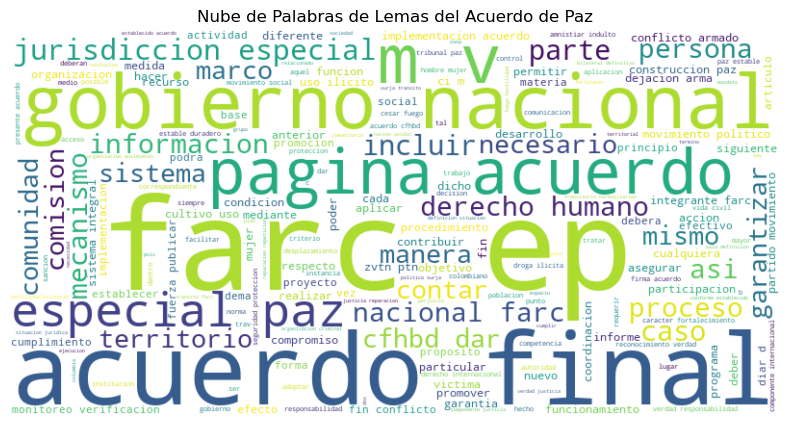

In [41]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Generate a word cloud from the lemmatized text
wordcloud = WordCloud(background_color="white", width=800, height=400).generate(text)

# Visualize and display the new word cloud
plt.figure(figsize=(10, 5))
plt.title("Nube de Palabras de Lemas del Acuerdo de Paz")
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")  # Hide the axis for better aesthetics

(-0.5, 799.5, 399.5, -0.5)

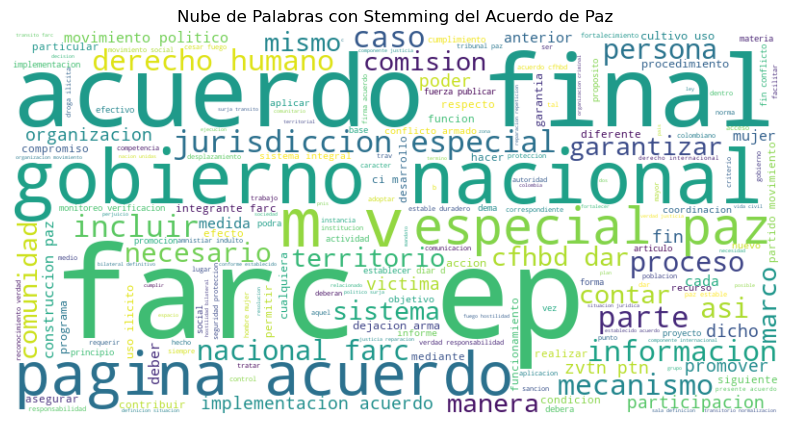

In [46]:
text2 = " ".join(doc for doc in df_normalized['stemm'])
text2

# Generate a word cloud from the lemmatized text
wordcloud = WordCloud(background_color="white", width=800, height=400).generate(text)

# Visualize and display the new word cloud
plt.figure(figsize=(10, 5))
plt.title("Nube de Palabras con Stemming del Acuerdo de Paz")
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")  # Hide the axis for better aesthetics